In [1]:
#Step a: Read the contents of the text file and store it in a string variable.

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from collections import Counter
from nltk.corpus import stopwords

def read_text():
    text = """
    
Particle Swarm Optimization (PSO) is a metaheuristic optimisation algorithm inspired by the social behaviour of bird flocking or fish schooling. It is commonly used to solve optimisation problems, including continuous and discrete optimisation tasks. PSO involves a population of particles that move through the search space to find the optimal solution.
How PSO works:   
1.	Initialisation: Initialise a population of particles randomly within the search space. Each particle represents a potential solution to the optimisation problem and has its own position and velocity.
2.	Fitness evaluation: Evaluate the fitness or objective function value for each particle based on its position in the search space. The fitness value represents the quality of the solution.
3.	Particle movement: Update the particle's velocity and position using the following equations:
a.	Velocity update: The particle adjusts its velocity based on its current velocity, its best previous position, and the best position found by any particle in the population.
b.	Position update: The particle updates its position based on its current position and the new velocity.
4.	Update personal and global bests: Update the best position found by each particle (personal best) and the best position found by any particle in the population (global best).
5.	Repeat steps 2 to 4 until a termination criterion is met:
a.	Termination criteria can be a maximum number of iterations, reaching a satisfactory fitness value, or a predefined threshold for improvement.
6.	Output: Once the termination criterion is met, the algorithm outputs the particle with the best fitness value as the optimised solution.
PSO's key concept is the collaboration among particles to explore the search space efficiently. Each particle adjusts its movement based on its previous experience (personal best) and the collective experience of the swarm (global best). This collaboration enables the particles to converge towards the optimal solution.
PSO offers several advantages:
•	Simplicity: PSO is relatively easy to implement and understand compared to other optimisation algorithms, such as genetic algorithms or simulated annealing.
•	Efficient exploration and exploitation: PSO efficiently explore the search space and balances exploration (diversification) and exploitation (intensification) to find the global or near-optimal solution.
•	Fewer parameters: PSO has fewer parameters to tune compared to some other optimisation algorithms. The most crucial parameters are the inertia weight, cognitive parameter, and social parameter, which control the particle movement and convergence behaviour.
•	Versatility: PSO can handle various types of optimisation problems, including continuous, discrete, and multi-objective optimisation tasks. It can be adapted and extended to fit specific problem requirements.
 
PSO limitations:
•	Premature convergence: PSO may converge prematurely to suboptimal solutions, especially in complex optimisation problems with rugged fitness landscapes. It can get trapped in local optima and struggle to escape them.
•	Sensitivity to parameter settings: While PSO has fewer parameters than some other optimisation algorithms, the performance of PSO can be sensitive to the parameter values. Finding appropriate parameter settings may require experimentation or tuning.
•	Lack of population diversity: PSO's reliance on a single global best position can result in limited population diversity. It may struggle in maintaining diverse solutions when dealing with multimodal or highly dynamic optimization problems.
To mitigate these limitations, various modifications and extensions of PSO have been proposed, such as hybrid approaches, adaptive parameter settings, or diversity maintenance strategies.
Approaches to overcome these limitations: 
Premature Convergence: PSO can sometimes converge prematurely to suboptimal solutions, especially in complex and multimodal search spaces. To address this, you can apply techniques such as:
•	Increasing Particle Diversity: Introduce mechanisms to encourage exploration and prevent particles from getting trapped in local optima. This can include strategies like diversity maintenance through particle diversity metrics or introducing random perturbations to particle positions or velocities.
•	Adaptive Parameters: Implement adaptive techniques to dynamically adjust the algorithm's parameters, such as inertia weight and acceleration coefficients, during the optimisation process. This allows the algorithm to balance exploration and exploitation based on the current search landscape.
•	Hybrid Approaches: Combine PSO with other optimisation algorithms to benefit from their complementary strengths. For example, combining PSO with genetic algorithms or local search algorithms can enhance the exploration capabilities and improve the quality of the obtained solutions.
High-Dimensional Search Spaces:    PSO may struggle with high-dimensional(many attributes)  optimisation problems due to the increased search space complexity and computational requirements. Some strategies to overcome this limitation include:
•	Dimensionality Reduction: Apply dimensionality reduction techniques to reduce the search space and focus on the most relevant features or dimensions. This can be done through feature selection or feature extraction methods before applying PSO.
•	Adaptive Neighbourhood Structures: Modify the PSO algorithm to use adaptive neighbourhood structures that can adjust dynamically based on the problem's dimensionality. This can help in maintaining effective information exchange among particles and avoiding the curse of dimensionality.
•	Problem-Specific Initialisation: Tailor the initialisation of particles based on the problem structure or characteristics. This can involve intelligent initialisation strategies that bias the initial positions towards promising regions of the search space, improving the efficiency of the optimisation process.
Computational Efficiency:   PSO can be computationally expensive, particularly for large-scale problems or problems requiring a large number of function evaluations. To enhance computational efficiency, you can consider:
•	Parallelisation: Utilise parallel computing techniques to distribute the computational workload across multiple processors or threads. This can accelerate the optimisation process and enable handling larger-scale problems.
•	Fitness Approximation: Use fitness approximation techniques, such as surrogate modelling or meta-modelling, to create a surrogate model that approximates the fitness landscape. This allows for faster evaluations and reduces the number of function calls required by PSO.
•	Hybridisation with Local Search: Combine PSO with local search algorithms, such as hill climbing or gradient-based optimisation, to exploit local search capabilities for fine-tuning solutions and accelerating convergence towards the optimal solutions.
By implementing these strategies, it is possible to mitigate the limitations of PSO and enhance its performance in solving complex optimisation problems. It is important to adapt and customise these approaches based on the specific problem domain and characteristics.
Applications of PSO in AI:    
•	Feature Selection: PSO can be used to perform feature selection, which involves identifying the most relevant subset of features from a high-dimensional dataset. By optimising an objective function that captures the classification performance or feature subset quality, PSO can efficiently explore the feature space and select the most informative features.
•	Neural Network Training: PSO can aid in training neural networks by optimising the network's weights and biases. It can be used to find the optimal set of parameters that minimise the network's error or maximise its performance on a given dataset. PSO can accelerate the convergence of neural network training and help avoid getting trapped in local optima.
•	Clustering: PSO can be employed for clustering tasks, where the goal is to group similar data points together. By optimising a clustering objective function that quantifies the compactness and separation of the clusters, PSO can determine the optimal cluster centroids and assignments, leading to effective and accurate clustering results.
•	Image and Signal Processing: PSO can be applied to image and signal processing tasks such as image segmentation, denoising and feature extraction. It can optimise parameters or thresholds to enhance the quality of processed images or signals, improve segmentation accuracy, or extract relevant features for subsequent analysis or classification.
•	Reinforcement Learning: PSO can be utilised in reinforcement learning settings, where an agent learns to make decisions in an environment to maximise a reward signal. PSO can optimise the agent's policy parameters, such as exploration-exploitation trade-offs or action selection strategies, to improve the agent's performance in learning and decision-making tasks.
•	Hyperparameter Optimisation: PSO can assist in tuning the hyperparameters of machine learning models. Hyperparameters, such as learning rates, regularisation parameters, or kernel widths, significantly impact the model's performance. PSO can explore the hyperparameter space and find the optimal combination of hyperparameters that yields the best model performance on a validation set.
These are just a few examples of how PSO can be applied in AI. The versatility and effectiveness of PSO make it a valuable tool in optimising various AI tasks, enhancing performance and improving efficiency in problem-solving.
Particle Swarm Optimisation applied to feature classification:    
•	Feature Selection: PSO can be used to select the most relevant subset of features from a high-dimensional dataset. By optimising an objective function that captures the classification performance (e.g., accuracy, F1-score), PSO can efficiently search through the feature space and identify the subset of features that contribute the most to the classification task. This helps in reducing the dimensionality of the data and improving the classification accuracy by focusing on the most informative features.
•	Feature Weighting: PSO can assign weights to individual features, indicating their importance in the classification process. By optimising an objective function that balances the contribution of each feature to the classification performance, PSO can assign appropriate weights to different features. This allows for an adaptive and data-driven feature weighing scheme, where more important features receive higher weights and contribute more significantly to the classification decision.
•	Feature Ranking: PSO can rank the features based on their relevance to the classification task. By optimising an objective function that maximises the discrimination between different classes, PSO can determine the importance or discriminative power of each feature. This provides a ranking of features, where the top-ranked features are considered the most relevant for classification.
•	Hybrid Approaches: PSO can be combined with other classification techniques to improve feature classification. For example, PSO can be used in conjunction with Support Vector Machines (SVM) or Artificial Neural Networks (ANN) to optimise the feature subset, feature weights, or both. This hybrid approach leverages the strengths of PSO and the classification technique to enhance the overall classification performance.
•	Multi-objective Optimization: PSO can handle multi-objective feature classification problems where multiple conflicting objectives need to be optimised simultaneously. For instance, maximising classification accuracy while minimising the number of selected features. PSO can optimise the trade-off between multiple objectives and provide a set of solutions representing different trade-off points on the Pareto front.
These applications highlight the versatility of PSO in feature classification tasks. PSO can effectively explore the feature space, select relevant features, assign appropriate weights, and provide rankings that contribute to improving the accuracy and efficiency of classification algorithms in AI.
Particle Swarm Optimisation in clustering:   
•	Determining Cluster Centres: PSO can be used to determine the optimal positions of cluster centres in various clustering algorithms. By optimising an objective function that quantifies the quality of clustering (e.g., minimising intra-cluster distance, maximising inter-cluster distance), PSO can efficiently search for the positions of cluster centres that result in well-separated and compact clusters.
•	Fuzzy Clustering: PSO can be applied to optimise the parameters of fuzzy clustering algorithms, such as the fuzzifier parameter or the membership function parameters. Fuzzy clustering allows for a softer assignment of data points to clusters, and PSO can optimise the parameters to maximise the clustering objective function and improve the quality of the fuzzy clusters.
•	Data Partitioning: PSO can be used to partition data into clusters by optimising an objective function that captures the compactness and separation of the data points within clusters. PSO explores the space of possible data partitions and finds the optimal assignment of data points to clusters, resulting in effective and accurate clustering results.
•	Hierarchical Clustering: PSO can assist in hierarchical clustering by optimising the merging or splitting decisions at each level of the clustering hierarchy. By optimising an objective function that considers the quality of the resulting hierarchical structure (e.g., minimising intra-cluster variance, maximising inter-cluster separation), PSO determines the optimal clustering decisions to form a hierarchical representation of the data.
•	Cluster Ensemble: PSO can be used to optimise the combination or weighing of multiple clustering solutions generated by different algorithms or parameter settings. By optimising an objective function that measures the consensus or quality of the ensemble, PSO finds the optimal combination of individual clustering solutions to create an improved and more robust clustering result.
•	Clustering with Constraints: PSO can be employed in constrained clustering tasks, where certain constraints or prior knowledge about the data are available. By incorporating constraints into the optimisation process, PSO can guide the clustering algorithm to respect the given constraints and produce clustering solutions that align with the prior knowledge.
These applications demonstrate how PSO can be utilised in various clustering scenarios, helping to determine optimal cluster centres, optimise fuzzy clustering parameters, partition data into clusters, improve hierarchical clustering, enhance cluster ensembles, and handle constrained clustering tasks. PSO's ability to search for the optimal solutions in complex search spaces makes it a valuable tool in improving the accuracy and effectiveness of clustering algorithms in AI.
Overall, PSO is a popular and effective optimisation algorithm that can be applied to a wide range of problems, including feature selection, parameter optimisation, and function optimisation. Its simplicity and efficiency make it a valuable tool in the field of artificial intelligence and optimisation.

"""  #  Pass text here
    return text

In [2]:
# Step b: Preprocess the text by removing punctuation, converting to lowercase, and splitting into individual words.
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    return words

In [3]:
# Step c: Remove stop words from the text.
def remove_stop_words(words):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words


In [4]:
# Step d: Calculate the frequency of each word.
def calculate_word_frequencies(words):
    word_freq = Counter(words)
    return word_freq


In [5]:
# Step e: Generate a word cloud using the frequency data.
def generate_word_cloud(word_freq):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    return wordcloud


In [6]:
# Step f: Display the word cloud.
def display_word_cloud(wordcloud):
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [7]:

def main():
    text = read_text()
    words = preprocess_text(text)
    filtered_words = remove_stop_words(words)
    word_freq = calculate_word_frequencies(filtered_words)
    wordcloud = generate_word_cloud(word_freq)
    display_word_cloud(wordcloud)

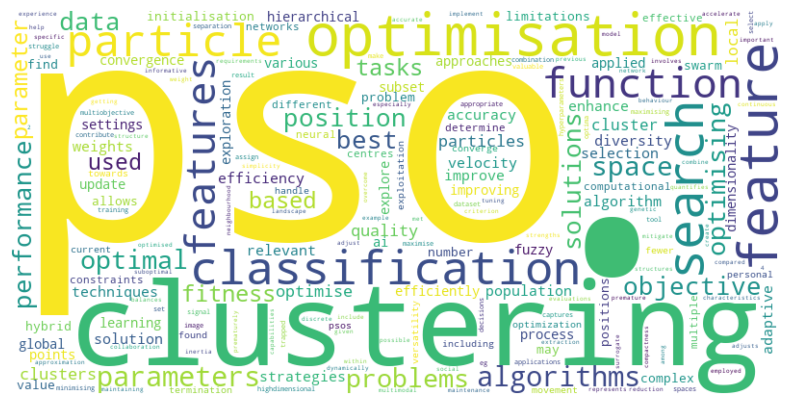

In [8]:
# Run the main function
if __name__ == '__main__':
    main()